In [1]:
# Import pandas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# reading csv file
# r stands for raw string, helps with unicode error (slashes)
filepath = r"C:\Users\krawc\OneDrive\Documents\DB\datasets\datacamp-master\Supervised Learning with scikit-learn\data\gapminder2.csv"
#df1 = pd.read_csv(filepath, encoding = 'utf8', index_col=0)
df1 = pd.read_csv(filepath, encoding = 'utf8')

In [2]:
df1.head()

,BMI_female,BMI_male,CO2,GDP,HIV,child_mortality,fertility,life,population
0,129.9049,24.59620,3.328945,12314.0,0.1,29.5,2.73,75.3,34811059.0
1,130.1247,22.25083,1.474353,7103.0,2.0,192.0,6.43,58.3,19842251.0
2,118.8915,27.50170,4.785170,14646.0,0.5,15.4,2.24,75.5,40381860.0
3,132.8108,25.35542,1.804106,7383.0,0.1,20.0,1.40,72.5,2975029.0
4,117.3755,27.56373,18.016313,41312.0,0.1,5.2,1.96,81.5,21370348.0


In [3]:
#EDA exploratory

In [4]:
#no data nan
sum(df1.isna().values)

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BMI_female       139 non-null    float64
 1   BMI_male         139 non-null    float64
 2   CO2              139 non-null    float64
 3   GDP              139 non-null    float64
 4   HIV              139 non-null    float64
 5   child_mortality  139 non-null    float64
 6   fertility        139 non-null    float64
 7   life             139 non-null    float64
 8   population       139 non-null    float64
dtypes: float64(9)
memory usage: 9.9 KB


<Axes: >

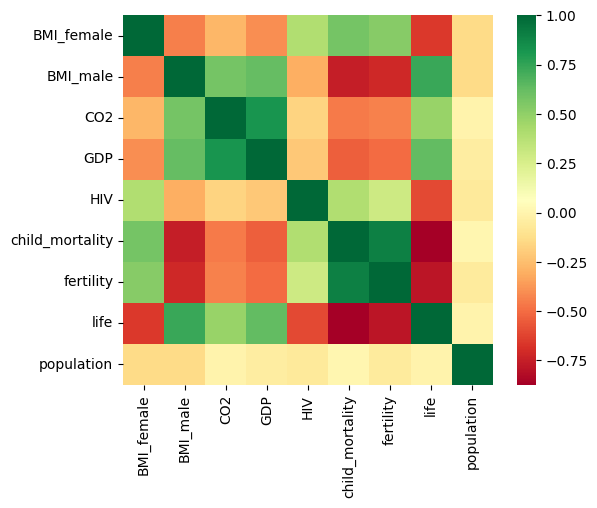

In [6]:
# corelation matrix
import seaborn as sns
sns.heatmap(df1.corr(), square=True, cmap='RdYlGn')

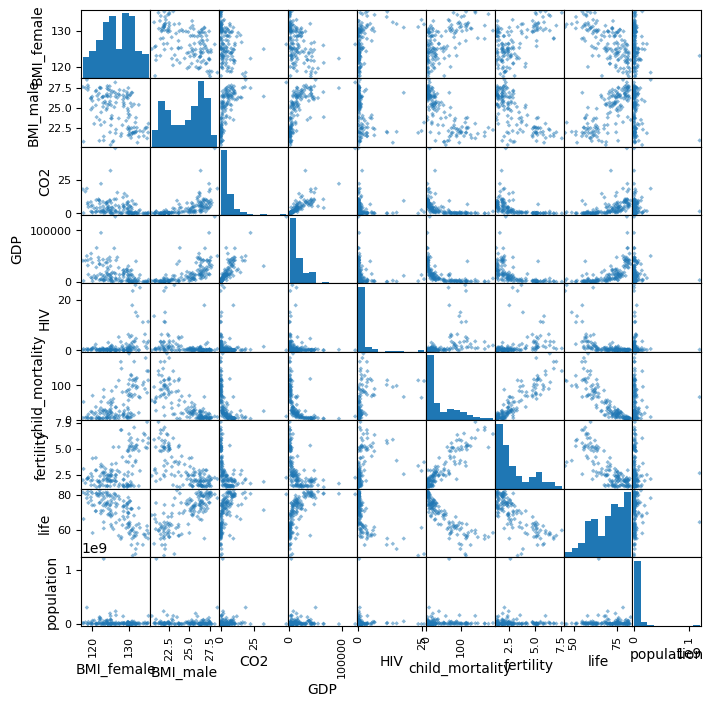

In [7]:
pd.plotting.scatter_matrix(df1,figsize=[8,8],s=5,alpha=0.5,marker='D')
plt.show()

In [8]:
# Create arrays for features and target variable
y = df1.life.values
X = df1.drop('life',axis='columns').values

cols=df1.drop('life',axis='columns').columns

# Reshape y if only one col
y = y.reshape(-1,1)

In [9]:
# Create train/test split for initial holdout
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE

[[-2.52417353e-01  4.93199537e-01 -1.47522293e-01  1.37767248e-04
  -7.21234146e-01 -8.67212952e-02 -3.30810285e-01 -2.03205164e-09]]


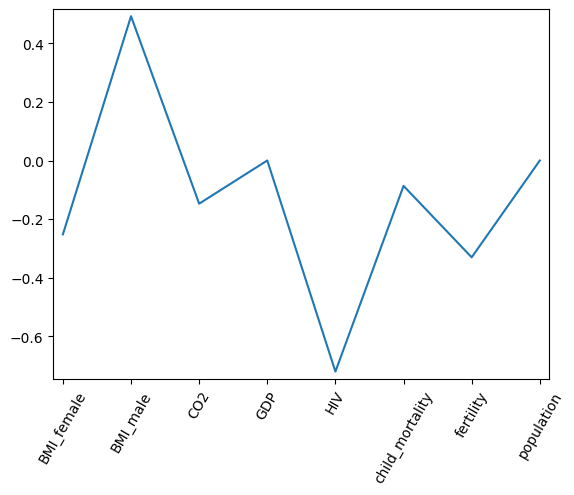

[0.91757221 0.88120907 0.80889405 0.88230806 0.87133147]
0.8722629708904206
R^2 on holdout
0.8380468732087374


In [11]:
# LinearRegression

# Import necessary modules
from sklearn.linear_model import LinearRegression


# Create the regressor: reg_all
reg = LinearRegression()

# Fit the regressor to the training data
reg.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg.predict(X_test)


# Compute and print the coefficients
print(reg.coef_)

# Plot the coefficients
plt.plot(range(len(cols)), reg.coef_[0])
plt.xticks(range(len(cols)), cols, rotation=60)
plt.margins(0.02)
plt.show()


# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X_train, y_train, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)
print(np.mean(cv_scores))


# Compute and print R^2 on holdout
print('R^2 on holdout')
print(reg.score(X_test, y_test))

[-1.02718797  0.87077565 -0.          1.7121967  -3.01406127 -4.29050876
 -0.11345526 -0.        ]


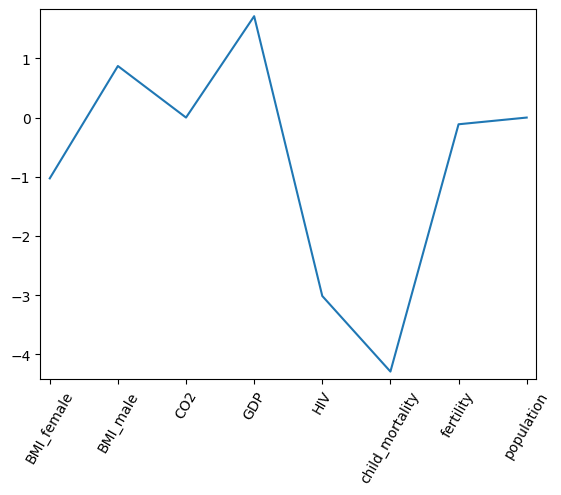

[0.93391127 0.8730398  0.81383417 0.88681055 0.87352917]
0.8762249924967644
R^2 on holdout
0.8380549539462845


In [12]:
#LASSO

# Import Lasso
from sklearn.linear_model import Lasso

# # Instantiate a lasso regressor: lasso
# lasso = Lasso(alpha=0.3, normalize=True)

# # Fit the regressor to the data
# lasso.fit(X_train,y_train)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('lasso', Lasso(alpha=0.3))]
pipeline = Pipeline(steps)
lasso = pipeline.fit(X_train, y_train)
lasso_coef = pipeline.named_steps['lasso'].coef_
# Compute and print the coefficients
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(cols)), lasso_coef)
plt.xticks(range(len(cols)), cols, rotation=60)
plt.margins(0.02)
plt.show()


# Perform 5-fold cross-validation: 
lasso_cv = cross_val_score(lasso, X_train, y_train, cv=5)

# Print the cross-validated scores
print(lasso_cv)
print(np.mean(lasso_cv))


# Compute and print R^2 on holdout
print('R^2 on holdout')
print(lasso.score(X_test, y_test))

[[-1.15880383  1.10959235 -0.6808358   2.16707286 -3.22066589 -3.85114652
  -0.61416349 -0.26756938]]


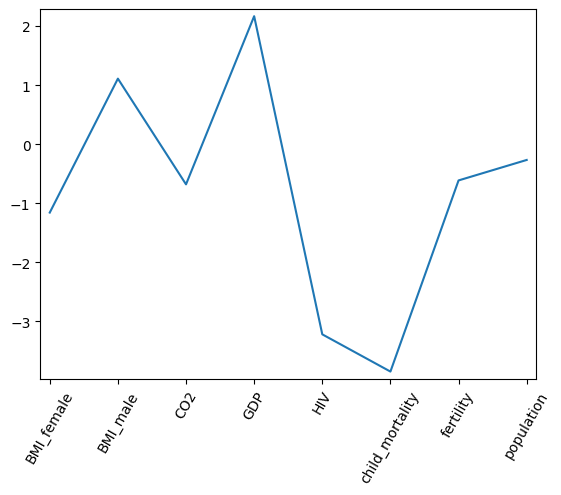

[0.92446784 0.88020916 0.80949173 0.88371061 0.87026721]
0.8736293070160508
R^2 on holdout
0.8385271139584141
Test set RMSE: 3.243


In [13]:
# RIDGE

# Import necessary modules
from sklearn.linear_model import Ridge

# # Instantiate a ridge regressor: ridge
# ridge = Ridge(alpha=0.8)

# # Fit the regressor to the data
# ridge.fit(X_train,y_train)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=0.8))]
pipeline = Pipeline(steps)
ridge = pipeline.fit(X_train, y_train)
ridge_coef = pipeline.named_steps['ridge'].coef_

# Compute and print the coefficients
print(ridge_coef)

# Plot the coefficients
plt.plot(range(len(cols)), ridge_coef[0])
plt.xticks(range(len(cols)), cols, rotation=60)
plt.margins(0.02)
plt.show()


# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X_train, y_train, cv=5)

# Print the cross-validated scores
print(ridge_cv)
print(np.mean(ridge_cv))


# Compute and print R^2 on holdout
print('R^2 on holdout')
print(ridge.score(X_test, y_test))

y_pred=ridge.predict(X_test)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print rmse_test
print('Test set RMSE: {:.3f}'.format(rmse_test))

[-1.22983855e+00  1.17663073e+00  0.00000000e+00  1.52620989e+00
 -2.69186530e+00 -2.73397447e+00 -1.14500149e+00 -2.19334335e-03]


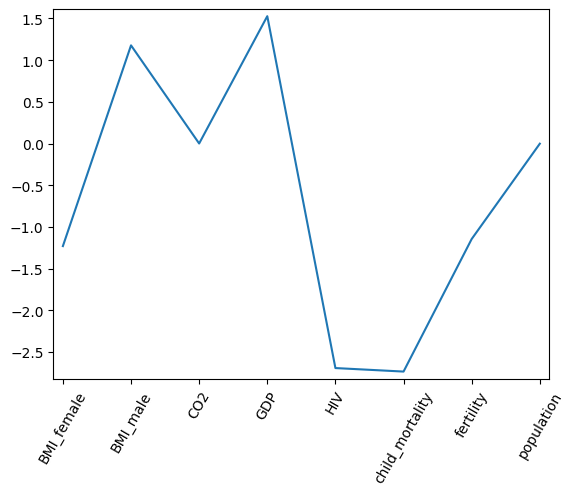

[0.94402308 0.85004777 0.79254304 0.88263616 0.86284523]
0.8664190601002846
R^2 on holdout
0.8592862745364882


In [14]:
#elastic net

# Import necessary modules
from sklearn.linear_model import ElasticNet

# # Instantiate the ElasticNet regressor: elastic_net
# elastic_net = ElasticNet(l1_ratio=0.6, alpha=0.5)

# # Fit it to the training data
# elastic_net.fit(X_train, y_train)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('elastic_net', ElasticNet(l1_ratio=0.6, alpha=0.5))]
pipeline = Pipeline(steps)
elastic_net = pipeline.fit(X_train, y_train)
elastic_net_coef = pipeline.named_steps['elastic_net'].coef_


# Compute and print the coefficients
print(elastic_net_coef)

# Plot the coefficients
plt.plot(range(len(cols)), elastic_net_coef)
plt.xticks(range(len(cols)), cols, rotation=60)
plt.margins(0.02)
plt.show()


# Perform 5-fold cross-validation: ridge_cv
elastic_net_cv = cross_val_score(elastic_net, X_train, y_train, cv=5)

# Print the cross-validated scores
print(elastic_net_cv)
print(np.mean(elastic_net_cv))


# Compute and print R^2 on holdout
print('R^2 on holdout')
print(elastic_net.score(X_test, y_test))



In [15]:
# # if CATEGORICAL data

# # Create dummy variables: 
# df2=df1.join(pd.get_dummies(df1.region))
# df2.drop('region',axis='columns', inplace=True)


In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE

In [17]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=2, min_samples_leaf=0.3, random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_pred, y_test)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 3.75


In [18]:
# compare linear error vs tree error

# Predict test set labels 
y_pred_lr = reg.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 3.25
Regression Tree test set RMSE: 3.75


In [19]:
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 4.38


In [ ]:
# if CV RMSE is > Tree test set RMSE - means overfitting -> model too compilcated -> reduce parameters

In [ ]:
# Random Forests

In [20]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25, random_state=2)
                           
# Fit rf to the training set            
rf.fit(X_train, y_train)

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 2.93


c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


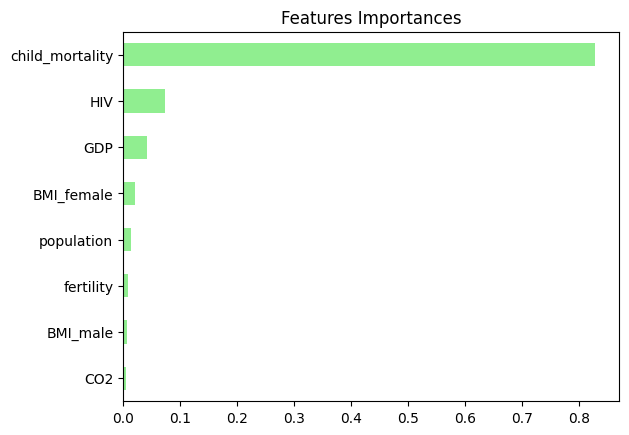

In [21]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_, index= cols)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [ ]:
#Gradient Boosting

In [17]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=3,n_estimators=200,random_state=2)

# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test set RMSE of gb: 2.880


In [18]:
#Stochastic Gradient Boosting (SGB)

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
                                 subsample=0.8,
                                 max_features=0.4,
                                 n_estimators=200,                                
                                 random_state=2)

# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test set RMSE of sgbr: 2.469
